### 1.Import

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.svm import SVC
from  sklearn.metrics import mean_absolute_error , mean_squared_error,root_mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report

1.1 Models

In [106]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

### 2.Load dataset

In [107]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\boston.csv"

In [108]:
df = pd.read_csv(path)

2.1.Show Data

In [109]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [110]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [111]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 3.Preprocessing

3.1Handle missing values

In [113]:
df.isna().sum().sort_values(ascending=False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

3.2 Handle duplicated

In [114]:
df.duplicated().sum()

0

In [115]:
df.shape

(506, 14)

In [116]:
df.columns.nunique()

14

3.3 Label Encode to all data

4.1 Data before balance

In [117]:
cols = list(df.nunique().sort_values().index[:])
cols

['CHAS',
 'RAD',
 'ZN',
 'PTRATIO',
 'TAX',
 'INDUS',
 'NOX',
 'MEDV',
 'AGE',
 'B',
 'DIS',
 'RM',
 'LSTAT',
 'CRIM']

### Visulization

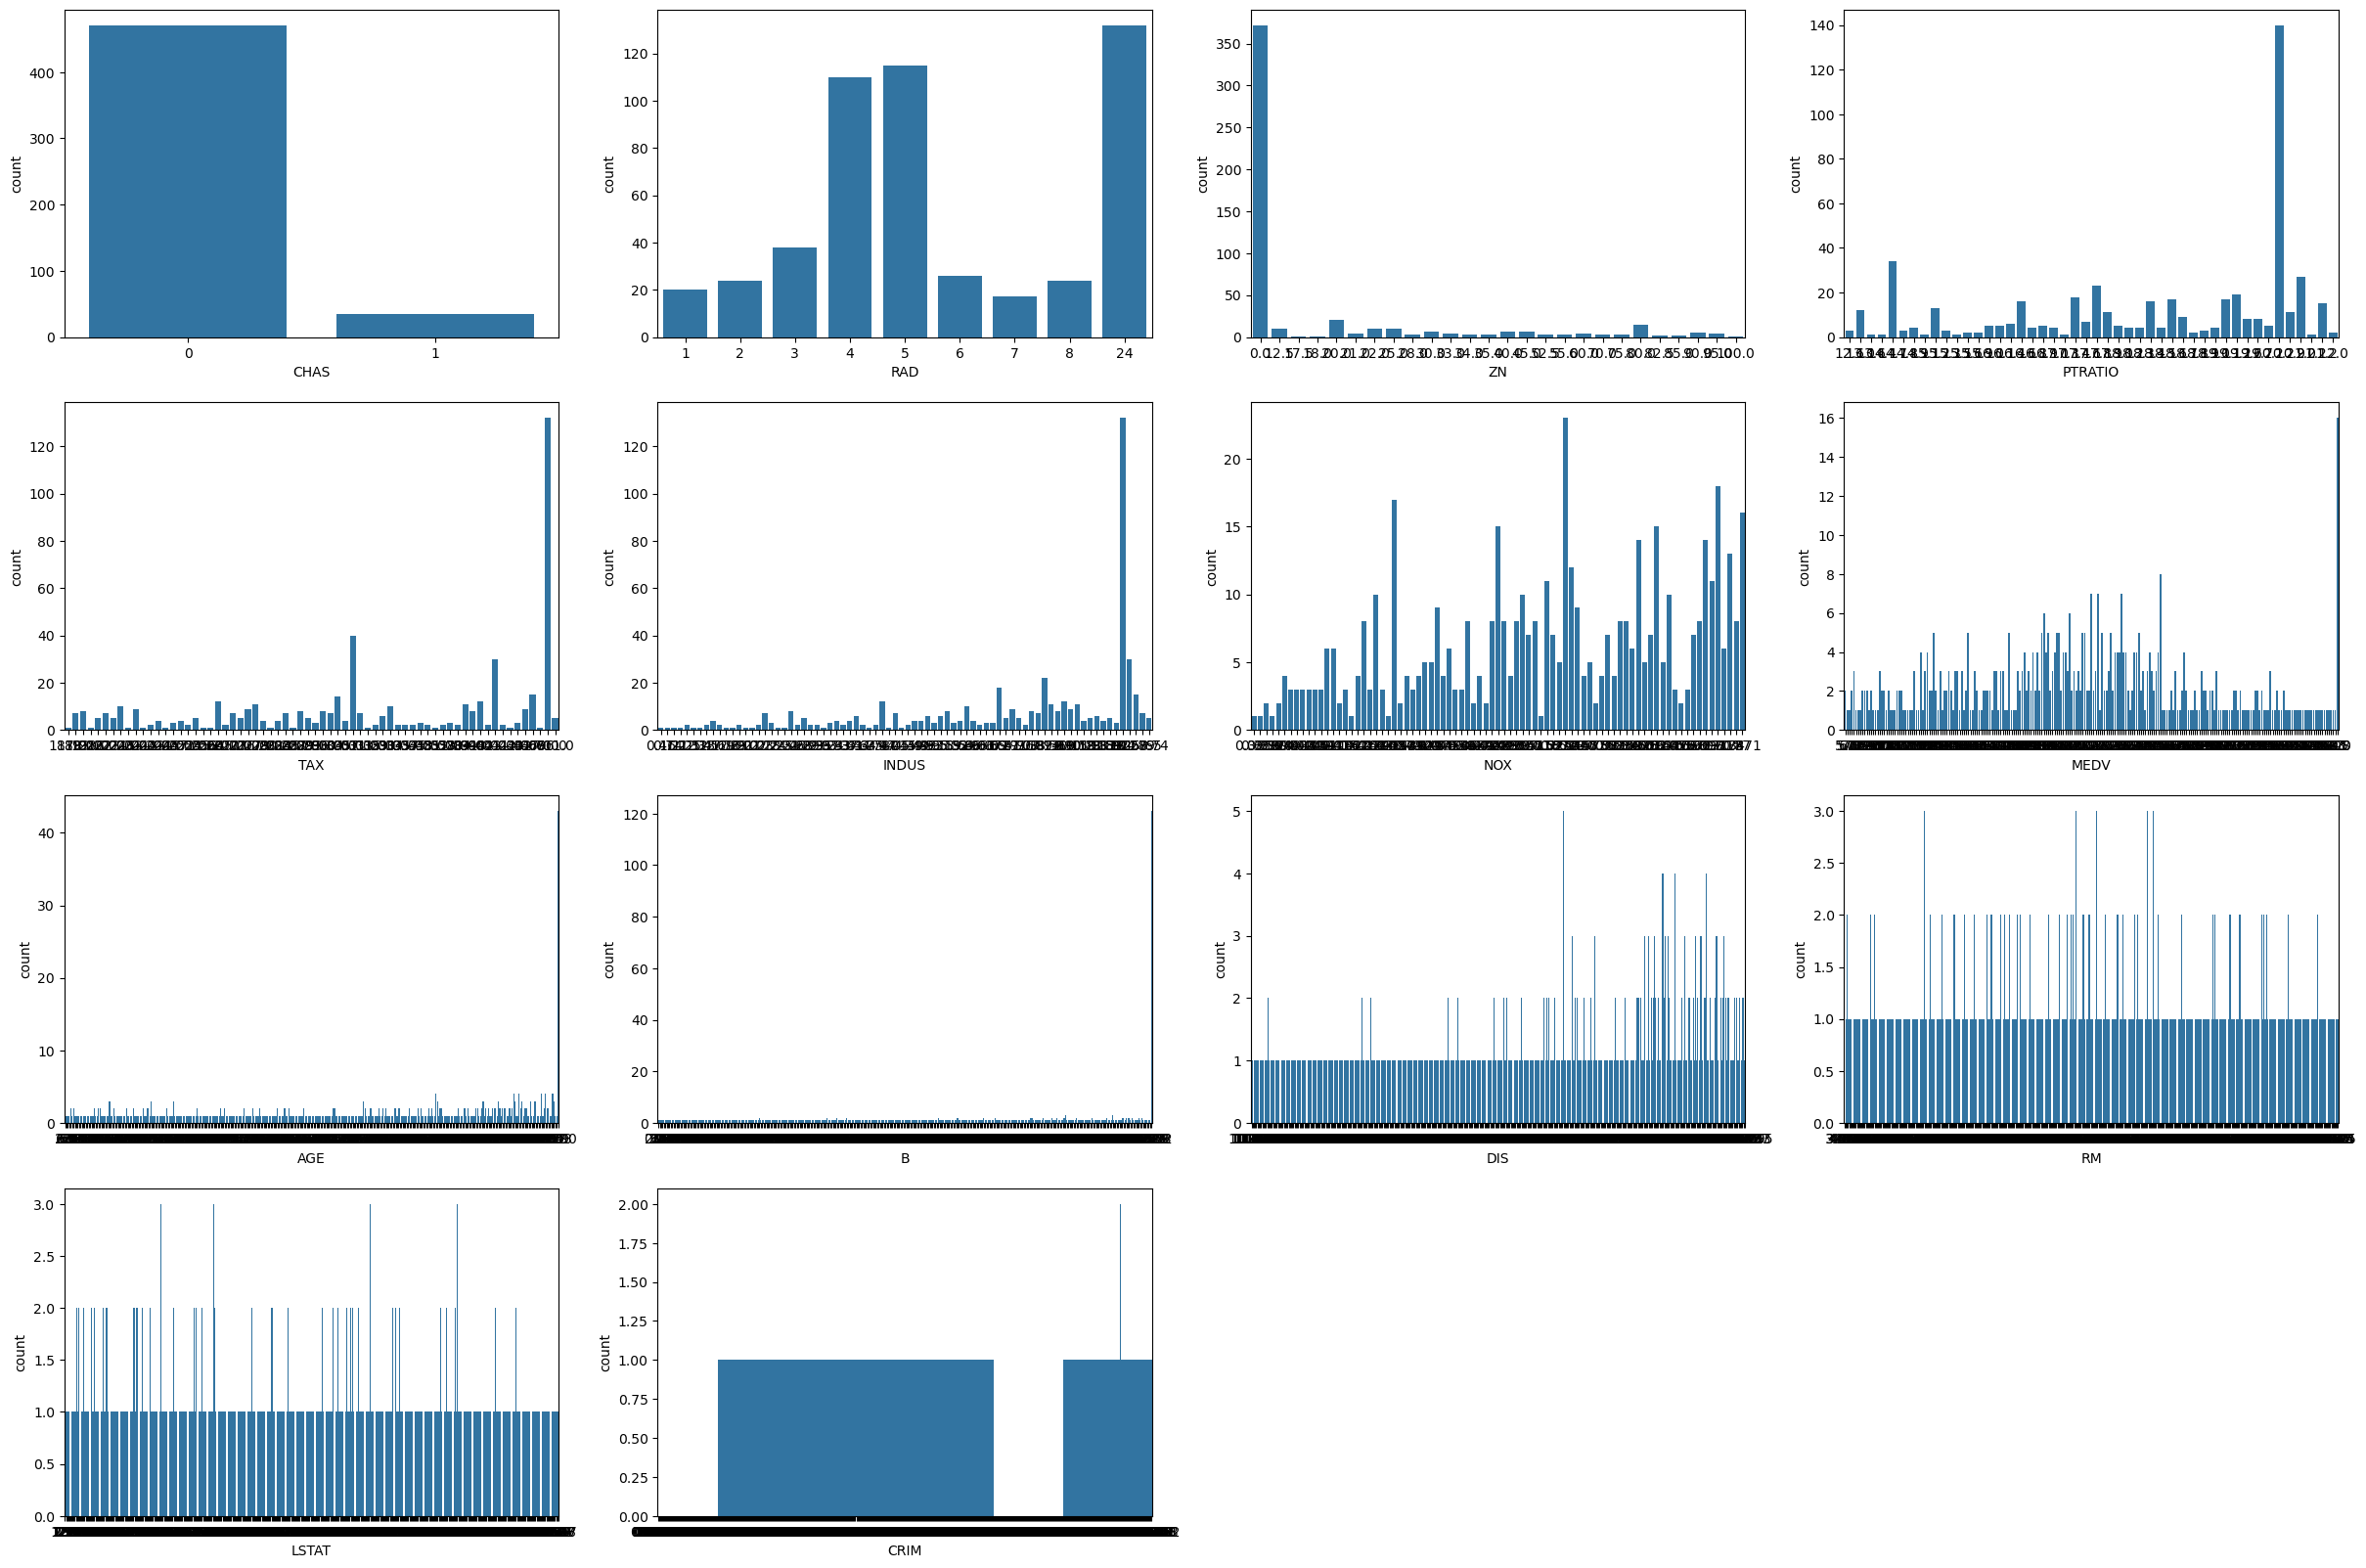

In [118]:

plt.figure(figsize=(30,20))
for n , col in enumerate(cols) :
    plt.subplot(4,4,n+1)
    sns.countplot(data=df,x=col)
    

<Axes: xlabel='MEDV', ylabel='Count'>

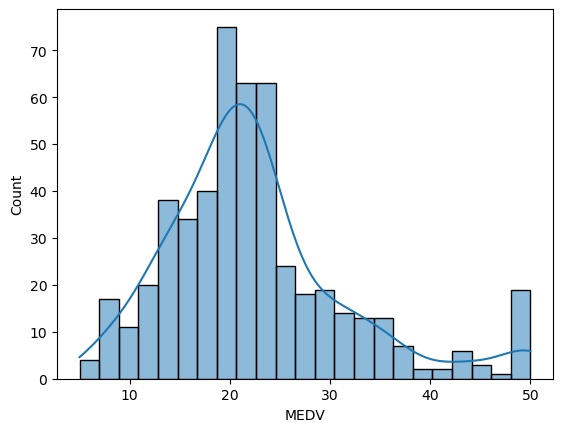

In [119]:
sns.histplot(data=df,x='MEDV',kde=True)

<Axes: xlabel='AGE', ylabel='Count'>

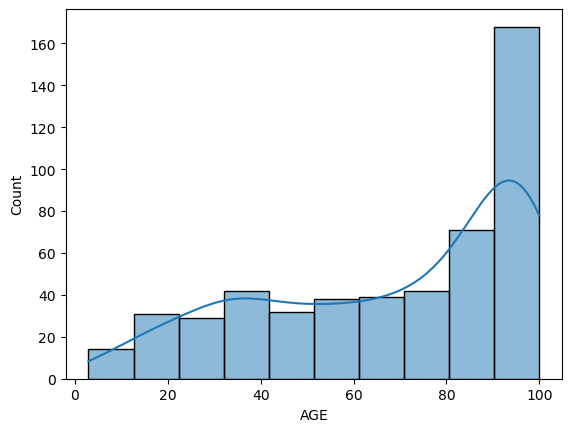

In [120]:
sns.histplot(data=df,x='AGE',kde=True)

<Axes: xlabel='MEDV', ylabel='CRIM'>

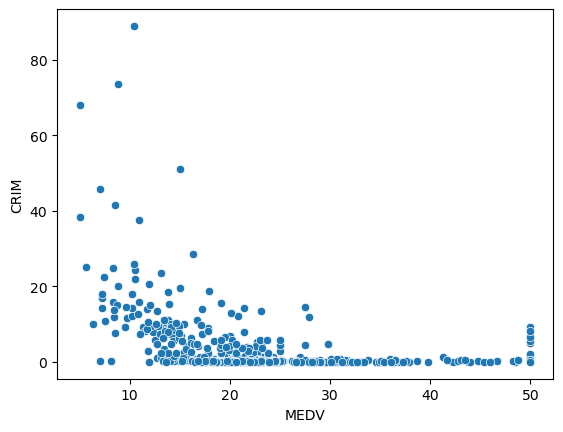

In [121]:
sns.scatterplot(data=df,x='MEDV',y='CRIM')

3.3 Split data

In [122]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

<Axes: >

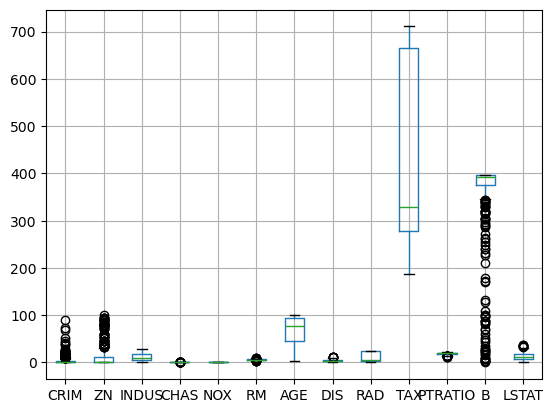

In [123]:
X.boxplot()

In [124]:
for c in X.select_dtypes(include=['object']).columns:
    lb = LabelEncoder()
    df[c] = lb.fit_transform(df[c])


In [125]:
x_train1, x_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)

### 5.Train model

In [128]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [129]:
metrics_df = pd.DataFrame(results).T
metrics_df.index.name = 'Model'
print("\nPerformance Metrics:\n", metrics_df)


Performance Metrics:
                               MAE        MSE      RMSE        R2
Model                                                           
Linear Regression        3.189092  24.291119  4.928602  0.668759
Decision Tree Regressor  2.394118  10.416078  3.227395  0.857963
Random Forest Regressor  2.041078   7.912745  2.812960  0.892100


In [131]:
best_model_name = metrics_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on R2-Score: {best_model_name}\n")


Best Model based on R2-Score: Random Forest Regressor

